# Проект "Анализ рынка заведений общественного питания г. Москвы"

## Содержание

##### Часть 0. Введение:
* [0.1 Цель проекта](#section_0.1)
* [0.2 Загрузка библиотек](#section_0.2)

##### Часть 1. Ознакомление с данными:
* [1.1 Загрузка, изучение и предобработка данных](#section_1.1)
* [1.2 Наблюдения и выводы](#section_1.2)

##### Часть 2. Анализ данных:
* [2.1 Анализ данных](#section_2.1)
* [2.2 Выводы и рекомендации по результатам анализа](#section_2.6)

##### Часть 3. Презентация результатов:
* [3.1 Презентация](#section_3.1)

## Часть 0. Введение:

<a id='section_0.1'></a>
### 0.1 Цель проекта

Планируется открыть небольшое оригинальное кафе в Москве, в котором гостей будут обслуживать роботы. 

Цель проекта - провести исследование рынка общественного питания г. Москвы, используя имеющиеся открытые данные, и сделать выводы о том, каким должно быть заведение, чтобы завоевать популярность среди гостей.

<a id='section_0.2'></a>
### 0.2 Загрузка необходимых библиотек

Загрузим библиотеки, которые нам понадобятся для выполнения проекта.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set_style('darkgrid') 
sns.set_palette('bright') 

from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

from io import BytesIO
import requests

## Часть 1. Ознакомление с данными:

<a id='section_0.1'></a>
### 1.1 Загрузка, изучение и предобработка данных

Загрузим имеющиеся данные и подготовим их к анализу: проверим данные на отсутствие пропусков, дубликатов, аномальных значений; при необходимости изменим тип данных на правильный.

In [2]:
# Загружаем данные и смотрим первые строки
data = pd.read_csv('/datasets/rest_data.csv')
data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# Переименовываем колонки
data.columns = ['id', 'name', 'is_chain', 'type', 'address', 'seating_capacity']

In [4]:
# Смотрим информацию о количестве и типах данных 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id                  15366 non-null int64
name                15366 non-null object
is_chain            15366 non-null object
type                15366 non-null object
address             15366 non-null object
seating_capacity    15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
# Проверяем на наличие дубликатов 
data.duplicated().sum()

0

In [6]:
data = data.drop_duplicates(subset = ['name', 'address'], keep = 'first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15159 entries, 0 to 15364
Data columns (total 6 columns):
id                  15159 non-null int64
name                15159 non-null object
is_chain            15159 non-null object
type                15159 non-null object
address             15159 non-null object
seating_capacity    15159 non-null int64
dtypes: int64(2), object(4)
memory usage: 829.0+ KB


In [7]:
# Проверяем уникальные значения в столбце is_chain
data['is_chain'].unique()

array(['нет', 'да'], dtype=object)

In [8]:
# Проверяем уникальные значения в столбце type
data['type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [9]:
# Заменяем названия некоторых типов на более короткие для графиков
data['type'] = data['type'].replace('магазин (отдел кулинарии)', 'кулинария')
data['type'] = data['type'].replace('предприятие быстрого обслуживания', 'фастфуд')
data['type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

In [10]:
# Смотрим информацию о данных в столбце seating_capacity
data['seating_capacity'].describe()

count    15159.000000
mean        59.942806
std         75.008636
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: seating_capacity, dtype: float64

<a id='section_1.2'></a>
### 1.2 Наблюдения и выводы

По результатам изучения данных мы сделали следующие выводы и наблюдения

1. Всего первоначальный набор данных содержит 15366 записей о предприятиях общественого питания г. Москвы.
2. Данные не содержат пропусков. Однако, проверка на дубликаты по названиям и адресам выявила примерно 1,5%  дубликатов, которые мы удалили.
3. После предобработки в нашей таблице содержатся следующая информация:
   * `id` — идентификатор объекта;
   * `name` — название объекта;
   * `is_chain` — информация о том, является ли объект сетевым (в формате 'да' / 'нет');
   * `type` — тип объекта;
   * `address` — адрес объекта;
   * `seating_capacity` — количество посадочных мест.
4. По типам объекты делятся на 9 групп: кафе, столовая, закусочная, фастфуд, ресторан, кафетерий, буфет, бар, кулинария.
5. По количеству посадочных мест есть объекты с вместимостью от 0 до 1700 человек. Средняя вместимость составляет 60 мест, медиана - 40 мест. 

## Часть 2. Анализ данных: 

<a id='section_2.1'></a>
### 2.1 Анализ данных

#### Виды объектов
Начнем с того, что исследуем соотношение видов объектов общественного питания по количеству.

In [11]:
# Сгруппируем данные, чтобы получить количество объектов для каждого вида
rest_types = data.groupby('type').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).reset_index()
rest_types.columns = ['type', 'count']

rest_types

,type,count
0,кафе,6003
1,столовая,2572
2,ресторан,2272
3,фастфуд,1886
4,бар,850
5,буфет,567
6,кафетерий,392
7,закусочная,345
8,кулинария,272


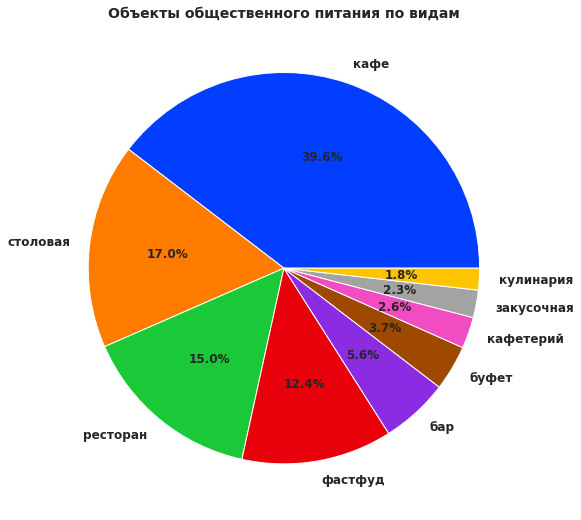

In [12]:
# Визуализируем полученные данные с помощью диаграммы "пирог"
plt.figure(figsize=(9, 9))
plt.pie('count', 
        labels = 'type',
        textprops = {'fontsize': 12, 'fontweight': 'bold'},
        autopct = '%1.1f%%', pctdistance = 0.6, 
        data = rest_types)
plt.title('Объекты общественного питания по видам', fontsize = 14, fontweight = 'bold')
plt.show()

Большую часть заведений составляют кафе (6003 объекта или 39,6% от общего количества заведений). За ними следуют столовые (2572 объекта / 17%), рестораны (2272 объекта / 15%) и предприятия быстрого обслуживания (1886 объектов / 12,4%). Оставшиеся 16% приходится на бары, буфеты, кафетерии, закусочные и кулинарии.

#### Сетевые / несетевые заведения

Исследуем соотношение сетевых и несетевых заведений по количеству.

In [13]:
# Группируем данные и считаем количество сетевых / несетевых объектов 
chain_rest = data.groupby('is_chain').agg({'id': 'count'}).sort_values(by='id').reset_index()
chain_rest

,is_chain,id
0,да,2940
1,нет,12219


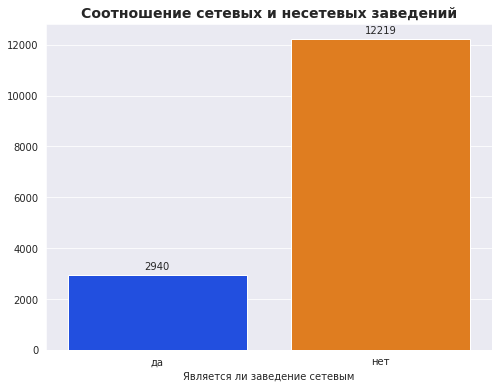

In [14]:
# Визуализируем данные с помощью столбчатого графика
plt.figure(figsize = (8, 6))
bplot = sns.barplot(x = 'is_chain', y = 'id', data = chain_rest)

# Добавим значения столбцов
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Подписываем оси, добавляем заголовок
plt.ylabel('')
plt.xlabel('Является ли заведение сетевым')
plt.title('Cоотношение сетевых и несетевых заведений', fontsize=14, fontweight='bold')
plt.show()

Видим, что несетевых заведений в 4 раза больше, чем сетевых.

Проанализируем, для каких видов объектов общественного питания более характерно сетевое распространение.

In [15]:
# Выбираем записи, относящиеся к сетевым объектам, группируем по типам и считаем количество
chain_rest_types = (data.query('is_chain == "да"')
                    .groupby('type')
                    .agg({'id': 'count'})
                    .sort_values(by='id', ascending=False)
                    .reset_index()
                   )

# Добавляем общее количество заведений по типам
chain_rest_types = chain_rest_types.merge(rest_types, on='type').sort_values(by='count', ascending=False)
chain_rest_types

,type,id,count
0,кафе,1384,6003
8,столовая,3,2572
2,ресторан,539,2272
1,фастфуд,782,1886
6,бар,37,850
7,буфет,10,567
5,кафетерий,51,392
4,закусочная,56,345
3,кулинария,78,272


In [16]:
# Вычисляем долю сетевых объектов
chain_rest_types['chain'] = (chain_rest_types['id'] / chain_rest_types['count']).round(2)

# Вычисляем долю несетевых объектов
chain_rest_types['no_chain'] = 1 - chain_rest_types['chain']
chain_rest_types.index = chain_rest_types['type']

# Удаляем лишние столбцы
chain_rest_types = chain_rest_types.drop(columns = ['count', 'id', 'type']).sort_values(by = 'chain', ascending = False)
chain_rest_types

,chain,no_chain
type,,
фастфуд,0.41,0.59
кулинария,0.29,0.71
ресторан,0.24,0.76
кафе,0.23,0.77
закусочная,0.16,0.84
кафетерий,0.13,0.87
бар,0.04,0.96
буфет,0.02,0.98
столовая,0.00,1.00


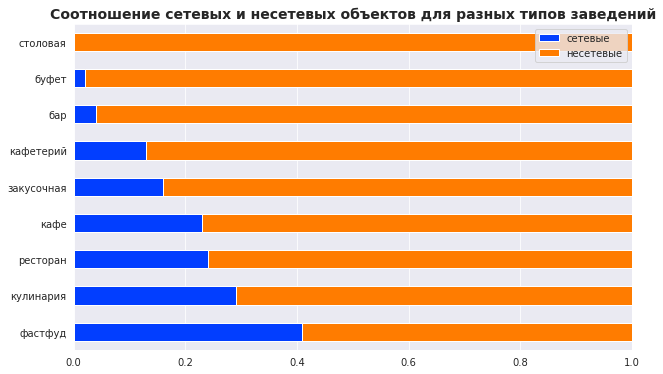

In [17]:
# Визуализируем с помощью столбчатого графика
rcParams['figure.figsize'] = 10, 6
chain_rest_types.plot(kind = 'barh', stacked = True)
plt.xlim(0, 1)
plt.legend(['сетевые', 'несетевые'])
plt.ylabel('')
plt.title('Соотношение сетевых и несетевых объектов для разных типов заведений', fontsize=14, fontweight='bold')
plt.show()

Видим, что наибольшая доля сетевых объектов приходится на предприятия быстрого обслуживания (41%). За ними следуют кулинарные отделы магазинов (29%), рестораны (24%), кафе (23%), закусочные (16%) и кафетерии (13%). Среди баров и буфетов доля сетевых заведений составялет менее 5%, а среди столовых г. Москвы, согласно данным, сетевых заведений нет.

#### Количество посадочных мест в сетевых заведениях

Узнаем, какое количество посадочных мест характерно для сетевых заведений.

In [18]:
# Выбираем рестораны, относящиеся к сетевым
chain_rests = data.query('is_chain == "да"')

# Переводим все названия в нижний регистр и вычищаем лишние пробелы для последующей группировки 
chain_rests['name'] = chain_rests['name'].str.lower().str.strip()

# Удаляем из названия лишние кавычки, тип заведения и пр.
chain_rests['name'] = chain_rests['name'].str.replace('"|кафе|кальянная|кальян-|японский|хинкальная|пекарня|быстрого питания|и кондитерская|кофейня|закусочная|- буфет|предприятие быстрого обслуживания|кулинарное бюро|семейное|семейное и кондитерская|семейный|чешская пивная|предприятие быстрого питания|пиццерия|детский клуб|пицца|ресторан|бар|«|»', '')
chain_rests['name'] = chain_rests['name'].str.replace('"|-|кафе|кальянная|кальян-|японский|хинкальная|пекарня|быстрого питания|и кондитерская|кофейня|закусочная|- буфет|предприятие быстрого обслуживания|кулинарное бюро|семейное|семейное и кондитерская|семейный|чешская пивная|предприятие быстрого питания|пиццерия|детский клуб|пицца|ресторан|бар|«|»', '')

# Убираем лишние пробелы
chain_rests['name'] = chain_rests['name'].str.strip()

In [19]:
# Группируем по названию и считаем количество заведений в сети и медиану количества посадочных мест
chain_size = (chain_rests
              .groupby('name')
              .agg({'id' : 'count', 'seating_capacity' : 'median'})
              .sort_values(by = 'id', ascending = False)
              .reset_index()
             )
# Переименовываем столбцы
chain_size.columns = ['name', 'rests_qty', 'median_seating']

# Смотрим результат
chain_size

,name,rests_qty,median_seating
0,шоколадница,180,50.0
1,kfc,172,45.5
2,макдоналдс,168,79.0
3,бургер кинг,151,45.0
4,теремок,107,24.0
...,...,...,...
403,москва макдоналдс,1,70.0
404,"starbucks, старбакс кофе",1,40.0
405,мск московская сеть кальянных на шаболовке,1,70.0
406,starbucks старбакс,1,34.0


In [20]:
# Посмотрим, количество сетей (предварительно удалив сети, в которых только 1 заведение, 
# так как, скорее всего, это связано с различным написанием названий сети
chain_size = chain_size.query('rests_qty != 1')

len(chain_size)

197

Всего мы выявили 197 сетей. 

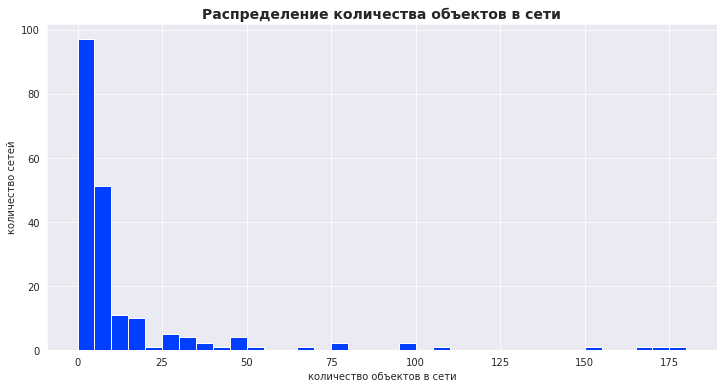

In [21]:
plt.figure(figsize = (12, 6))
chain_size['rests_qty'].hist(bins = 36, range = (0, 180))
plt.xlabel('количество объектов в сети')
plt.ylabel('количество сетей')
plt.title('Распределение количества объектов в сети', fontsize = 14, fontweight = 'bold')
plt.show()

Видим, что согласно данным, большая часть сетей имеет до 20 объектов.

Проанализируем одновременно количество объектов в сети и количество мест на каждом объекте.

In [22]:
# Выделим данные по сетевым кафе в отдельный датафрейм
data_chains = chain_rests.query("name.isin(@chain_size.name)")

In [23]:
# Добавляем данные по размерам сетей
data_chains = data_chains.merge(chain_size, left_on = 'name', right_on = 'name', how = 'left')
data_chains.head(5)

,id,name,is_chain,type,address,seating_capacity,rests_qty,median_seating
0,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,2,32.5
1,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,8,33.0
2,22579,алло,да,кафе,"город Москва, улица Авиаторов, дом 14",32,15,32.0
3,144107,суши wok,да,фастфуд,"город Москва, Азовская улица, дом 3",7,75,6.0
4,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,47,98.0


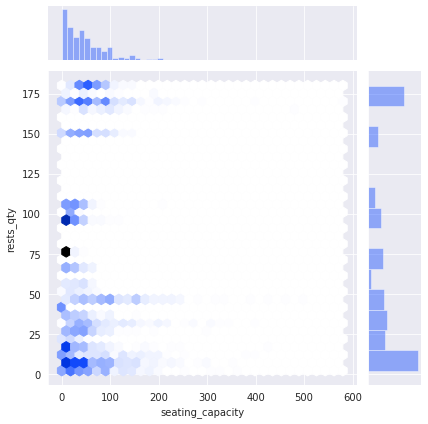

In [24]:
# Визуализирум данные с помощью графика jointplot
rcParams['figure.figsize'] = 9, 9
sns.jointplot(x = 'seating_capacity', y = 'rests_qty', data = data_chains, kind = 'hex')
plt.show()

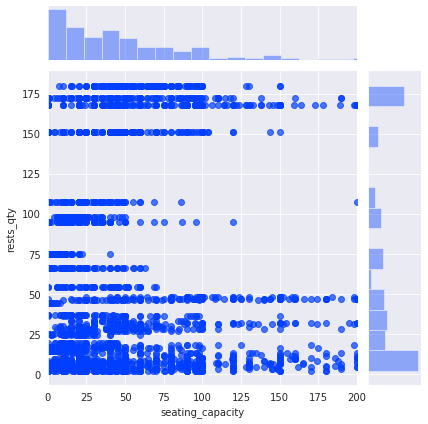

In [25]:
# Ограничим диапазон данных по количеству посадочных мест
rcParams['figure.figsize'] = 9, 9
sns.jointplot(x = 'seating_capacity', y = 'rests_qty', data = data_chains, xlim = (0, 200), alpha = 0.7)
plt.show()

Судя по графику, больше всего заведений относятся к сетям с количеством объектов от 2 до 40 и количеством посадочных мест от 0 до 50.

Посмотрим на распределение посадочных мест в крупных сетях.

In [26]:
# Выделяем топ-10 сетей по количеству объектов
chain_size_top10 = chain_size.head(10)

chain_size_top10

,name,rests_qty,median_seating
0,шоколадница,180,50.0
1,kfc,172,45.5
2,макдоналдс,168,79.0
3,бургер кинг,151,45.0
4,теремок,107,24.0
5,домино'с,98,16.0
6,крошка картошка,95,15.0
7,суши wok,75,6.0
8,милти,75,0.0
9,папа джонс,66,20.0


In [27]:
# Выбираем данные заведений, относящихся к топ-10 сетям 
data_top10_chains = chain_rests.query("name.isin(@chain_size_top10.name)")

# Посмотрим медиану количества посадочных мест в крупных сетях
data_top10_chains['seating_capacity'].median()

32.0

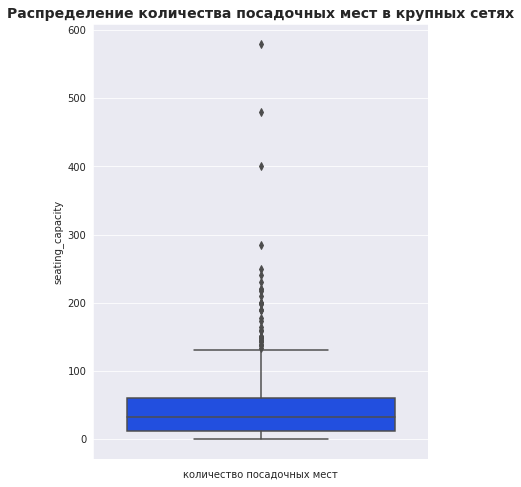

In [28]:
# Визуализируем данные по количеству посадочных мест в выбранных ресторанах с помощью графика "скрипка"
plt.figure(figsize = (6, 8))
sns.boxplot(y = 'seating_capacity', data = data_top10_chains)
plt.xlabel('количество посадочных мест')
plt.title('Распределение количества посадочных мест в крупных сетях', fontsize = 14, fontweight = 'bold')
plt.show()

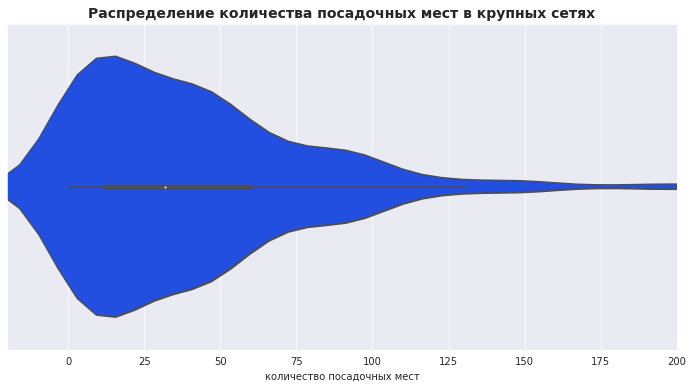

In [29]:
# Визуализируем данные по количеству посадочных мест в сетевых ресторанах с помощью графика "скрипка"
plt.figure(figsize = (12, 6))
sns.violinplot(y = 'seating_capacity', data = data_top10_chains, orient = 'h', grid = True)
# Ограничим диапазон посадочных мест максимумом в 200 
plt.xlim(-20, 200)
plt.xlabel('количество посадочных мест')
plt.title('Распределение количества посадочных мест в крупных сетях', fontsize = 14, fontweight = 'bold')
plt.show()

К топ-10 сетям г. Москвы по количеству заведений можно отнести следующие:
 - Шоколадница (180 объектов), 
 - KFC (172	объекта),
 - Макдоналдс (168 объектов),
 - Бургер Кинг (151	объект),
 - Теремок (107	объектов), 
 - Домино'с	(98 объектов),
 - Крошка-картошка (95 объектов)
 - Суши wok (75	объектов), 
 - Милти (75 объектов),
 - Папа Джонс (66 объектов).
 
По результатам анализа количества посадочных мест в крупных сетях можно отметить, что большая часть заведений имеет от 0 до 70 посадочных мест, с медианой 32 посадочных места. 
 
На следующем этапе сравним количество посадочных мест в сетях с количеством посадочных мест в целом в различных типах заведений.

#### Количество посадочных мест по типам заведений

Проанализируем количество посадочных мест по типам заведений. Для этого визуализируем количество посадочных мест для каждого типа с помощью графика "ящик с усами". Для большей наглядности установим верхнюю границу на 450 посадочных местах.

In [30]:
# Группируем данные по типу, считаем среднее количество посадочных мест и медиану
median_seating_capacity = data.groupby('type').agg({'seating_capacity' : ['mean', 'median']})
median_seating_capacity

seating_capacity       
                       mean median
type                              
бар               43.609412     35
буфет             51.654321     32
закусочная         6.884058      0
кафе              39.902549     32
кафетерий          9.155612      6
кулинария          5.610294      0
ресторан          97.109595     80
столовая         130.457621    103
фастфуд           20.743372      6

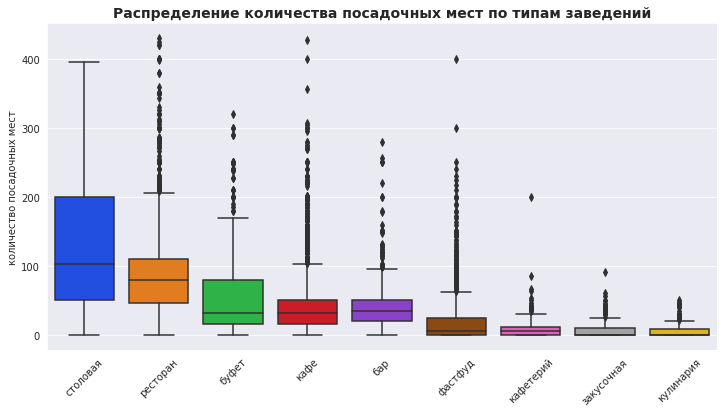

In [31]:
# Строим "ящик с усами"
plt.figure(figsize = (12, 6))
sns.boxplot(x = "type", 
            y = "seating_capacity", 
            data = data.query('seating_capacity < 450'), 
            order = ['столовая', 'ресторан', 'буфет', 'кафе', 'бар', 
                   'фастфуд', 'кафетерий', 
                   'закусочная', 'кулинария'],
            palette = 'bright') 
plt.title('Распределение количества посадочных мест по типам заведений',
         fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('количество посадочных мест')
plt.show()

Видим, что наибольшее количество посадочных мест характерно для заведений типа "столовая" (медиана - 103 места). За ними следуют рестораны с медианой в 80 посадочных мест. На третьем месте - бары, буфеты и кафе, у которых медиана 30-35 мест. 

В данном случае мы выбрали медиану в качестве меры центральной тенденции, так как по графику видно, что распределения скошены вправо (имеют длинный "хвост" и выбросы), и, соответственно, среднее - как более подверженное влиянию выбросов - хуже отражает реальную картину.

#### Распределение заведений по улицам и районам

Посмотрим, как распределены предприятия общественного питания по районам и улицам Москвы. Найдем улицы с наибольшим количеством предприятий общественного питания и с наименьшим количеством. Проанализируем, в каких районах они находятся.

In [32]:
# Выделяем в отдельный столбец информацию об улице из столбца address
data['street'] = (data['address']
                  .str
                  .extract('(([А-яё0-9-\s]+)?(улица|переулок|шоссе|просек|тупик|посёлок|территория|проспект|корпус|километр|переулок|линия|Проезд|поселение|аллея|квартал|микрорайон|проезд|бульвар|набережная|площадь)([А-яё0-9-\s]+)?)')[0]
                 )

In [33]:
# Проверяем, не осталось ли незаполненных строк в столбце с названием улицы
data.query('street.isna()')

,id,name,is_chain,type,address,seating_capacity,street


In [34]:
# Выделим только название улицы в отдельный столбец для объединения с данными по районам
data['street_name'] = data['street'].str.replace('улица|переулок|шоссе|просек|тупик|посёлок|территория|проспект|километр|переулок|линия|Проезд|поселение|аллея|квартал|микрорайон|проезд|бульвар|набережная|площадь', '')

# Приведем написание к нижнему регистру и уберем лишние пробелы
data['street_name'] = data['street_name'].str.lower().str.strip()    

In [35]:
# Загружаем файл с районами и округами
spreadsheet_id = '17gqoqTe_InjybMiudYvp2oqsY1VIOyXhhMdBG3XiZeg'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
addresses_mosgaz = pd.read_csv(BytesIO(r.content))
addresses_mosgaz = addresses_mosgaz.drop(columns = 'areaid')
addresses_mosgaz.head(5)

,streetname,okrug,area
0,Выставочный переулок,ЦАО,Пресненский район
1,улица Гашека,ЦАО,Пресненский район
2,Большая Никитская улица,ЦАО,Пресненский район
3,Глубокий переулок,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,ЦАО,Пресненский район


In [36]:
# Выделим название улицы в том же формате, что и в основном наборе данных
addresses_mosgaz['street_name'] = addresses_mosgaz['streetname'].str.replace('улица|переулок|шоссе|просек|тупик|посёлок|территория|проспект|километр|переулок|линия|Проезд|поселение|аллея|квартал|микрорайон|проезд|бульвар|набережная|площадь', '')

# Приведем написание к нижнему регистру и уберем лишние пробелы
addresses_mosgaz['street_name'] = addresses_mosgaz['street_name'].str.lower().str.strip()  

addresses_mosgaz.head(5)

,streetname,okrug,area,street_name
0,Выставочный переулок,ЦАО,Пресненский район,выставочный
1,улица Гашека,ЦАО,Пресненский район,гашека
2,Большая Никитская улица,ЦАО,Пресненский район,большая никитская
3,Глубокий переулок,ЦАО,Пресненский район,глубокий
4,Большой Гнездниковский переулок,ЦАО,Пресненский район,большой гнездниковский


Теперь изучим, на каких улицах находится наибольшее количество кафе.

In [37]:
# Выделяем топ-10 улиц по количеству объектов
top10_streets_with_many_rests = (data
                                 .groupby(['street', 'street_name'])
                                 .agg({'id': 'count'})
                                 .sort_values(by = 'id', ascending = False)
                                 .head(11)
                                 .reset_index()
                                )

# Переименовываем столбец
top10_streets_with_many_rests.rename(columns={'id': 'restaurants_qty'}, inplace = True)

# Смотрим результат
top10_streets_with_many_rests

,street,street_name,restaurants_qty
0,проспект Мира,мира,197
1,Профсоюзная улица,профсоюзная,179
2,Ленинградский проспект,ленинградский,169
3,Пресненская набережная,пресненская,165
4,Варшавское шоссе,варшавское,162
5,Ленинский проспект,ленинский,147
6,поселение Сосенское,сосенское,136
7,проспект Вернадского,вернадского,127
8,Кутузовский проспект,кутузовский,112
9,Каширское шоссе,каширское,110


In [38]:
# Удаляем строку, в которой значится не улица, а целый район
top10_streets_with_many_rests = top10_streets_with_many_rests.drop(6)
                              
# Смотрим результат
top10_streets_with_many_rests

,street,street_name,restaurants_qty
0,проспект Мира,мира,197
1,Профсоюзная улица,профсоюзная,179
2,Ленинградский проспект,ленинградский,169
3,Пресненская набережная,пресненская,165
4,Варшавское шоссе,варшавское,162
5,Ленинский проспект,ленинский,147
7,проспект Вернадского,вернадского,127
8,Кутузовский проспект,кутузовский,112
9,Каширское шоссе,каширское,110
10,Кировоградская улица,кировоградская,106


Теперь посмотрим, в каких районах находятся улицы с большим количеством кафе.

In [39]:
# Выбираем из датасета с адресами ранее определенные улицы,
# группируем их по району и считаем количество улиц в каждом районе
areas_with_many_rests = addresses_mosgaz.query('street_name.isin(@top10_streets_with_many_rests.street_name)')
areas_with_many_rests = (areas_with_many_rests
                         .groupby('area')
                         .agg({'street_name' : 'count'})
                         .sort_values(by = 'street_name', ascending = False)
                         .reset_index()
                        )
areas_with_many_rests

,area,street_name
0,Район Дорогомилово,3
1,Район Чертаново Северное,2
2,Донской район,2
3,Ломоносовский район,2
4,Район Проспект Вернадского,2
5,Обручевский район,2
6,Район Теплый Стан,2
7,Район Нагатино-Садовники,2
8,Район Чертаново Южное,2
9,Район Чертаново Центральное,2


In [40]:
# Выбираем районы, в которых находится более 1 улицы
top_areas_with_many_rests = areas_with_many_rests.query('street_name > 1')
top_areas_with_many_rests

,area,street_name
0,Район Дорогомилово,3
1,Район Чертаново Северное,2
2,Донской район,2
3,Ломоносовский район,2
4,Район Проспект Вернадского,2
5,Обручевский район,2
6,Район Теплый Стан,2
7,Район Нагатино-Садовники,2
8,Район Чертаново Южное,2
9,Район Чертаново Центральное,2


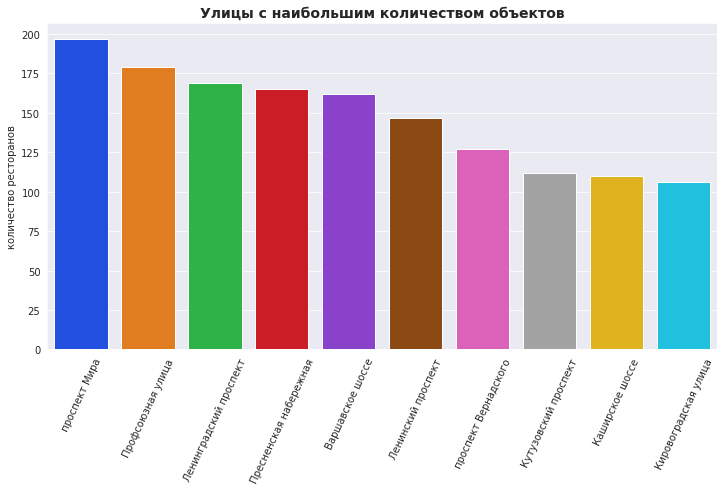

In [41]:
# Визуализируем с помощью столбчатого графика
plt.figure(figsize = (12, 6))
sns.barplot(x = 'street', y = 'restaurants_qty', data = top10_streets_with_many_rests) 
plt.title('Улицы с наибольшим количеством объектов', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 65)
plt.xlabel('')
plt.ylabel('количество ресторанов')
plt.show()

Улицы с наибольшим количеством объектов (от 160 до 200 объектов): 
 - проспект Мира (197 объекта), 
 - Профсоюзная улица (179 объекта), 
 - Ленинградский проспект (169 объект), 
 - Пресненская набережная (165 объектов),
 - Варшавское шоссе (162 объекта).

От 110 до 150 объектов находится на следующих улицах (в порядке убывания): 
 - Ленинский проспект, 
 - проспект Вернадского, 
 - Кутузовский проспект, 
 - Каширское шоссе, 
 - Кировоградская улица.

Улицы с большим количеством ресторанов находятся в 38 районах г. Москвы. К районам, в которых находится более одной такой улицы, относятся Дорогомилово, Чертаново Северное, Чертаново Южное, Чертаново Центральное, Донской район, Ломоносовский район, Район Проспект Вернадского, Обручевский район, Теплый Стан, Нагатино-Садовники, Тропарево-Никулино, Гагаринский.

Изучим улицы с одним объектом общественного питания: сколько их, где они находятся.

In [42]:
# Выберем улицы, на которых находится только 1 ресторан
streets_with_one_rest = data.groupby('street_name').agg({'id': 'count'}).query('id == 1')

# Посмотрим, сколько их
len(streets_with_one_rest)

627

In [43]:
# Формируем сводную таблицу количеством улиц с 1 рестораном по районам
areas_with_single_rest_streets = (addresses_mosgaz
                                  .query('street_name.isin(@streets_with_one_rest.index)')
                                  .groupby('area')
                                  .agg({'street_name' : 'count'})
                                  .sort_values(by = 'street_name', ascending = False)
                                  .reset_index()
                                 )


# Выбираем районы, в которых таких улиц 15 и более
areas_with_single_rest_streets.query('street_name >= 15')

,area,street_name
0,Таганский район,27
1,Басманный район,26
2,Район Хамовники,26
3,Пресненский район,19
4,Район Марьина роща,19
5,Тверской район,19
6,Район Арбат,18
7,Мещанский район,16
8,Район Замоскворечье,15


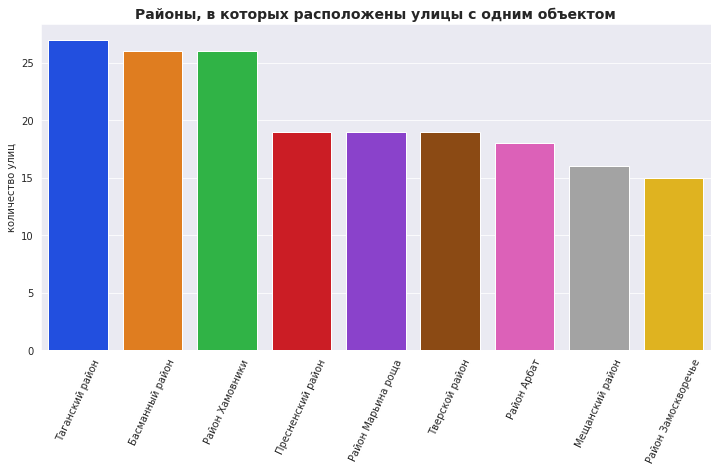

In [44]:
# Визуализируем с помощью столбчатого графика
plt.figure(figsize = (12, 6))
sns.barplot(x = 'area', y = 'street_name', data = areas_with_single_rest_streets.query('street_name >= 15'), palette = 'bright') 
plt.title('Районы, в которых расположены улицы с одним объектом', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 65)
plt.xlabel('')
plt.ylabel('количество улиц')
plt.show()

Всего мы нашли 627 улиц, на которых расположен лишь 1 ресторан.

Среди районов, в которых находится максимальное количество таких улиц, лидируют с 15 и более улицами:
 - Таганский район,
 - Басманный район,
 - Район Хамовники,
 - Пресненский район,
 - Район Марьина роща,
 - Тверской район,
 - Район Арбат,
 - Мещанский район,
 - Район Замоскворечье.

#### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Посмотрим, есть ли закономерности в распределении количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [45]:
# Создаем массив с улицами, на которых расположено максимальное количество ресторанов
top10_streets = top10_streets_with_many_rests['street']

# Выделяем данные по ресторанам, которые находятся на этих улицах
rests_in_busy_streets = data.query('street.isin(@top10_streets)')

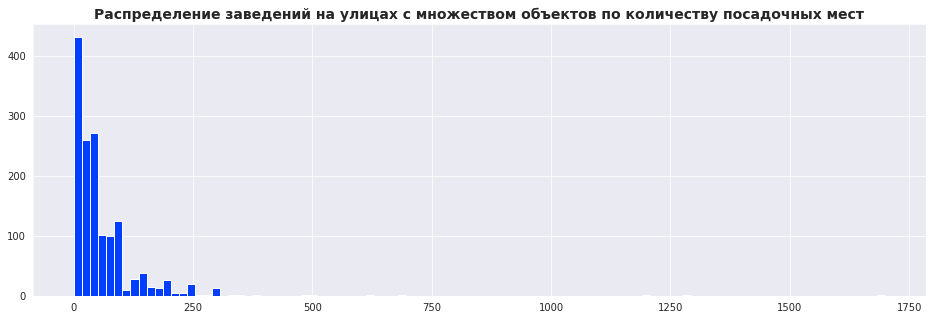

In [46]:
# Визуализируем данные по количеству посадочных мест с помощью гистограммы
plt.figure(figsize = (16, 5))
rests_in_busy_streets['seating_capacity'].hist(bins = 100)
plt.title('Распределение заведений на улицах с множеством объектов по количеству посадочных мест', 
          fontsize = 14, fontweight = 'bold')
plt.show()

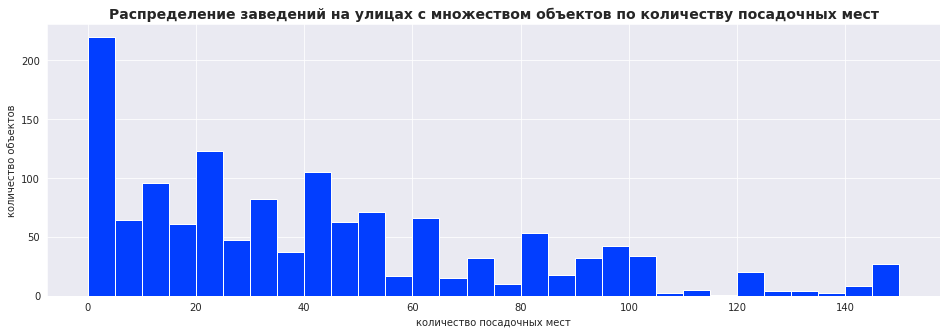

In [47]:
# Визуализируем данные по количеству посадочных мест в диапазоне до 150 с помощью гистограммы
plt.figure(figsize = (16, 5))
rests_in_busy_streets['seating_capacity'].hist(range = (0,150), bins = 30)
plt.title('Распределение заведений на улицах с множеством объектов по количеству посадочных мест', fontsize = 14, 
          fontweight = 'bold')
plt.xlabel('количество посадочных мест')
plt.ylabel('количество объектов')
plt.show()

Видим, что большая часть объектов, расположенных на улицах с большим количеством ресторанов, имеет не более 50 посадочных мест. Это логично, учитывая, что на таких улицах у клиентов есть большой выбор заведений, а владельцам невыгодна низкая заполненность объектов, так как аренда составляет одную из основных статей расходов.

<a id='section_2.2'></a>
### 2.2 Выводы и рекомендации по результатам анализа

#### Выводы

На основании проведенного анализа можно сделать следующие выводы:

1. Большую часть заведений составляют кафе (6003 объекта или 39,6% от общего количества заведений). За ними следуют столовые (2572 объекта / 17%), рестораны (2272 объекта / 15%) и предприятия быстрого обслуживания (1886 объектов / 12,4%). Оставшиеся 16% приходится на бары, буфеты, кафетерии, закусочные и кулинарии.


2. Из всего количества заведений (которое равно 15159) только 19,4% являются сетевыми.


3. Наибольшая доля сетевых объектов приходится на предприятия быстрого обслуживания (41%). За ними следуют кулинарные отделы магазинов (29%), рестораны (24%), кафе (23%), закусочные (16%) и кафетерии (13%). Среди баров и буфетов доля сетевых заведений составляет менее 5%, а среди столовых г. Москвы, согласно данным, сетевых заведений нет.


4. Всего в датасете содержится информация о 197 сетях. Большая часть сетей включает в себя до 20 объектов. 

Больше всего заведений относятся к сетям с количеством объектов от 2 до 40 и количеством посадочных мест от 0 до 50.

К топ-10 сетям г. Москвы по количеству заведений можно отнести следующие:
 - Шоколадница (180 объектов), 
 - KFC (172	объекта),
 - Макдоналдс (168 объектов),
 - Бургер Кинг (151	объект),
 - Теремок (107	объектов), 
 - Домино'с	(98 объектов),
 - Крошка-картошка (95 объектов)
 - Суши wok (75	объектов), 
 - Милти (75 объектов),
 - Папа Джонс (66 объектов).
 
Большая часть заведений крупных сетей имеет от 0 до 70 посадочных мест, с медианой 32 посадочных места. 
 

5. Анализ количества посадочных мест по типам заведений выявил, что наибольшее количество посадочных мест характерно для заведений типа "столовая" (медиана - 103 места). За ними следуют рестораны с медианой в 80 посадочных мест. На третьем месте - бары, буфеты и кафе, у которых медиана 30-35 мест.


6. ТОп- 10 улиц с большим количеством объектов (от 110 до 200 объектов) расположены в 38 районах. К районам, в которых находится более одной такой улицы, относятся Дорогомилово, Чертаново Северное, Чертаново Южное, Чертаново Центральное, Донской район, Ломоносовский район, Район Проспект Вернадского, Обручевский район, Теплый Стан, Нагатино-Садовники, Тропарево-Никулино, Гагаринский.


7. Всего мы нашли 627 улиц, на которых расположен лишь 1 ресторан.

Среди районов, в которых находится максимальное количество таких улиц, лидируют с 15 и более улицами:
 - Таганский район,
 - Басманный район,
 - Район Хамовники,
 - Пресненский район,
 - Район Марьина роща,
 - Тверской район,
 - Район Арбат,
 - Мещанский район,
 - Район Замоскворечье.
 
8. Большая часть объектов, расположенных на улицах с большим количеством ресторанов, имеет не более 50 посадочных мест. Это логично, учитывая, что на таких улицах у клиентов есть большой выбор заведений, а владельцам невыгодна низкая заполненность объектов, так как аренда составляет одну из основных статей расходов.


#### Рекомендации

На основании информации выше можно сделать следующие рекомендации:

*1. Местоположение объекта*

Представляется целесообразным разместить объект на одной из улиц, где находится большое количество предприятий общественного питания. Наличие множества других объектов говорит о стабильном потоке гостей. Привлекать аудиторию можно за счет уникального предложения (такого, как, например, обслуживание роботами).

*2. Тип и формат объекта*

Так как мы рассматриваем вариант с обслуживанием, то среди подобного рода заведений наиболее популярным является формат кафе. В сравнении с ресторанами он более демократичен и привлекает более широкую аудиторию посетителей и, кроме того, не требует меньших затрат для открытия от владельцев. При этом данный формат весьма универсален: гости могут приходить в кафе и для семейного отдыха, и для встреч с друзьями, и для деловых обедов.  

*3. Количество посадочных мест*

Стоит ограничиться объектом с 30-35 посадочными местами. Это позволит протестировать бизнес без слишком больших затрат на аренду, дизайн и ремонт. В случае успешности формата можно будет масштабироваться за счет открытия дополнительных объектов, которые в дальнейшем можно объединить в сеть.

## Часть 3. Презентация результатов:

<a id='section_3.1'></a>
### 3.1 Презентация

<a href="https://drive.google.com/file/d/11WJhVmVdswwDvwY2i64Ge0tzip5OosSt/view?usp=sharing">Ссылка на презентацию</a>